# ADVANCED TEXT MINING
- 본 자료는 텍스트 마이닝을 활용한 연구 및 강의를 위한 목적으로 제작되었습니다.
- 본 자료를 강의 목적으로 활용하고자 하시는 경우 꼭 아래 메일주소로 연락주세요.
- 본 자료에 대한 허가되지 않은 배포를 금지합니다.
- 강의, 저작권, 출판, 특허, 공동저자에 관련해서는 문의 바랍니다.
- **Contact : ADMIN(admin@teanaps.com)**

---

## WEEK 03-1. 데이터 크롤링 원리 이해하기
- Python을 활용해 웹에서 데이터를 크롤링하는 원리에 대해 다룹니다.

---

> **\*\*\* 주의사항 \*\*\***  
본 자료에서 설명하는 웹크롤링하는 방법은 해당 기법에 대한 이해를 돕고자하는 교육의 목적으로 사용되었으며,  
이를 활용한 대량의 무단 크롤링은 범죄에 해당할 수 있음을 알려드립니다.

In [1]:
# Python 코드를 통해 웹페이지에 정보를 요청하기 위해 request 패키지를 import 합니다.
import requests
# 웹에서 가져온 이미지를 화면에 출력하기 위해 Image 패키지를 import 합니다.
from PIL import Image

In [2]:
# 네이버 웹툰 페이지에 접속해봅니다.

네이버 웹툰 샘플 URL : https://comic.naver.com/webtoon/detail.nhn?titleId=626907&no=89&weekday=wed

In [3]:
# 마우스 우클릭을 통해 이미지 복사를 시도합니다.
# 네이버 웹툰 이미지는 단순히 우클릭을 통해 복사할 수 없습니다.
# Chrome 브라우저 [메뉴] > [도구 더보기] > [개발자도구] 메뉴를 통해 개발자도구를 실행합니다.
# 개발자도구 좌측 상단의 화살표버튼을 누르고 웹툰 이미지 위에 커서를 올린 뒤 클릭합니다.
# 개발자도구에 표시되는 이미지 URL을 확인합니다.

~~~html
<img src="https://image-comic.pstatic.net/webtoon/626907/89/20160329221846_880abe0a5e96698c7ba78293bccc1917_IMAG01_1.jpg" title="" alt="comic content" id="content_image_0" onerror="this.src='https://static-comic.pstatic.net/staticImages/COMICWEB/NAVER/img/common/blank.gif'" onload="loadImageEvent(this);" oncontextmenu="return false" ondragstart="return false" onselectstart="return false" class="">
~~~

In [4]:
# 이미지 URL을 브라우저 주소창에 입력해 접속해봅니다.

이미지 URL : https://image-comic.pstatic.net/webtoon/626907/89/20160329221846_880abe0a5e96698c7ba78293bccc1917_IMAG01_1.jpg

In [5]:
# 이미지 URL을 통해 브라우저 상에서 이미지를 확인할 수 있습니다.
# 이제 Python을 활용해 이미지 URL에 접속합니다.
URL = "https://image-comic.pstatic.net/webtoon/626907/89/20160329221846_880abe0a5e96698c7ba78293bccc1917_IMAG01_2.jpg"
response = requests.get(URL)
print(response.content)

b'\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n\n<html>\n\n<head>\n\n<style>\n\na:link\t\t\t{font:8pt/11pt verdana; color:red}\n\na:visited\t\t{font:8pt/11pt verdana; color:#4e4e4e}\n\n</style>\n\n<title>HTTP 403 Forbidden</title>\n\n</head>\n\n<script>\n \nfunction Homepage(){\n\n// in real bits, urls get returned to our script like this:\n\n// res://shdocvw.dll/http_404.htm#http://www.DocURL.com/bar.htm \n\n\n\n\tDocURL = document.location.href;\n\n\t\t\n\n\t//this is where the http or https will be, as found by searching for :// but skipping the res://\n\n\tprotocolIndex=DocURL.indexOf("://",4);\n\n\t\n\n\t//this finds the ending slash for the domain server \n\n\tserverIndex=DocURL.indexOf("/",protocolIndex + 3);\n\n\n\n\t\t//for the href, we need a valid URL to the domain. We search for the # symbol to find the begining \n\n\t//of the true URL, and add 1 to skip it - this is the BeginURL value. We use serverIndex as the end marker.\n\n\t//urlresult=DocURL.substring(pr

In [6]:
#print(response.content)
# 위 주석표시된 코드를 통해 웹페이지 응답을 확인하면 "The page cannot be displayed"와 같이 요청이 거절됨을 확인할 수 있습니다.

~~~html
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
<head>
<style>
a:link			{font:8pt/11pt verdana; color:red}
a:visited		{font:8pt/11pt verdana; color:#4e4e4e}
</style>
<title>HTTP 403 Forbidden</title>
</head>
<script>
function Homepage(){
    // in real bits, urls get returned to our script like this:
    // res://shdocvw.dll/http_404.htm#http://www.DocURL.com/bar.htm 
	DocURL = document.location.href;
	//this is where the http or https will be, as found by searching for :// but skipping the res://
	protocolIndex=DocURL.indexOf("://",4);
	//this finds the ending slash for the domain server 
	serverIndex=DocURL.indexOf("/",protocolIndex + 3);
	//for the href, we need a valid URL to the domain. We search for the # symbol to find the begining 
	//of the true URL, and add 1 to skip it - this is the BeginURL value. We use serverIndex as the end marker.
	//urlresult=DocURL.substring(protocolIndex - 4,serverIndex);
	BeginURL=DocURL.indexOf("#",1) + 1;
	if (protocolIndex - BeginURL > 7)
		urlresult=""
	urlresult=DocURL.substring(BeginURL,serverIndex);
	//for display, we need to skip after http://, and go to the next slash
	displayresult=DocURL.substring(protocolIndex + 3 ,serverIndex);
	// Security precaution: must filter out "urlResult" and "displayresult"
	forbiddenChars = new RegExp("[<>'\"]", "g");	// Global search/replace
	urlresult = urlresult.replace(forbiddenChars, "");
	displayresult = displayresult.replace(forbiddenChars, "");
	document.write('<A target=_top HREF="' + urlresult + '">' + displayresult + "</a>");
}
</script>

<body bgcolor="white">
<table width="400" cellpadding="3" cellspacing="5">
  <tr>
    <td id="tableProps" valign="center" align="left" bgcolor=red>
    &nbsp; &nbsp; &nbsp; &nbsp;
    </td>
    <td id="tableProps2" align="left" valign="middle" width="360"><font id="errortype"
    style="COLOR: black; FONT: 13pt/15pt verdana">The page cannot be displayed</font>
    </td>
  </tr>
  <tr>
    <td id="tablePropsWidth" width="400" colspan="2"><font
    style="COLOR: black; FONT: 8pt/11pt verdana">
    Access control configuration prevents your request from being allowed at this time.
    </font></td>
  </tr>
  <tr>
    <td id="tablePropsWidth2" width="400" colspan="2"><font id="LID1"
    style="COLOR: black; FONT: 8pt/11pt verdana"><hr color="#C0C0C0" noshade>
    <p id="LID2">Please try the following:</p><ul>
      <li id="list1">If you typed the page address manually, make sure that it is typed correctly.<br>
      </li>
      <li id="list2">Open the <script> Homepage(); </script> home page, and then look for links to the information
        you want. </li>
      <li id="list3">If you are using Internet Explorer, click <a onclick="saOC.NavigateToDefaultSearch();event.returnValue=false" href=""> search </a> to find more information. </li>
      <li id="list4">Click the <a href="javascript:history.back(1)">
      Back</a> button to try another link. </li>    
      <li id="list5">If you feel this is incorrect, contact your service provider. </li>
</ul>
    <p><br>
    </p>
    <h2 id="ietext" style="font:8pt/11pt verdana; color:black">HTTP 403 - Forbidden <br>
    jaguar     <BR>
    </h2>
    </font></td>
  </tr>
</table>
</body>
</html>
~~~

In [7]:
# Python을 통해 웹페이지에 URL을 요청하는 경우, 네이버 정책에 의해 응답이 거절됩니다.
# request 패키지의 header 옵션을 활용하면 Python을 통해 접속했음을 숨기고 요청이 가능합니다.
# URL 요청에서 클라이언트의 정보를 User-Agent 라고 합니다.
# User-Agent는 브라우저 유형(Chrome, IE, Safari, ...), 운영체제(Windows, MAC OS) 등의 정보를 포함합니다.
# User-Agnet 표기법은 아래 사이트를 참조합니다.

 User Agent String.Com : http://useragentstring.com

In [8]:
# header 옵션을 포함하여 다시 이미지 URL에 접속합니다.
URL = "https://image-comic.pstatic.net/webtoon/626907/89/20160329221846_880abe0a5e96698c7ba78293bccc1917_IMAG01_1.jpg"
headers = {
    "Referer": "http://comic.naver.com/webtoon/detail.nhn?titleId=626907&no=197&weekday=wed",
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.139 Safari/537.36",
}
response = requests.get(URL, headers=headers)
print(response.content)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x08D\x02v\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19

In [9]:
#print(response.content)
# 위 주석표시된 코드를 통해 웹페이지 응답을 확인하면 아래와 같이 일정한 패턴을 가진 데이터가 응답했음을 확인할 수 있습니다.

~~~html
\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x08D\x02v\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\ ...
~~~

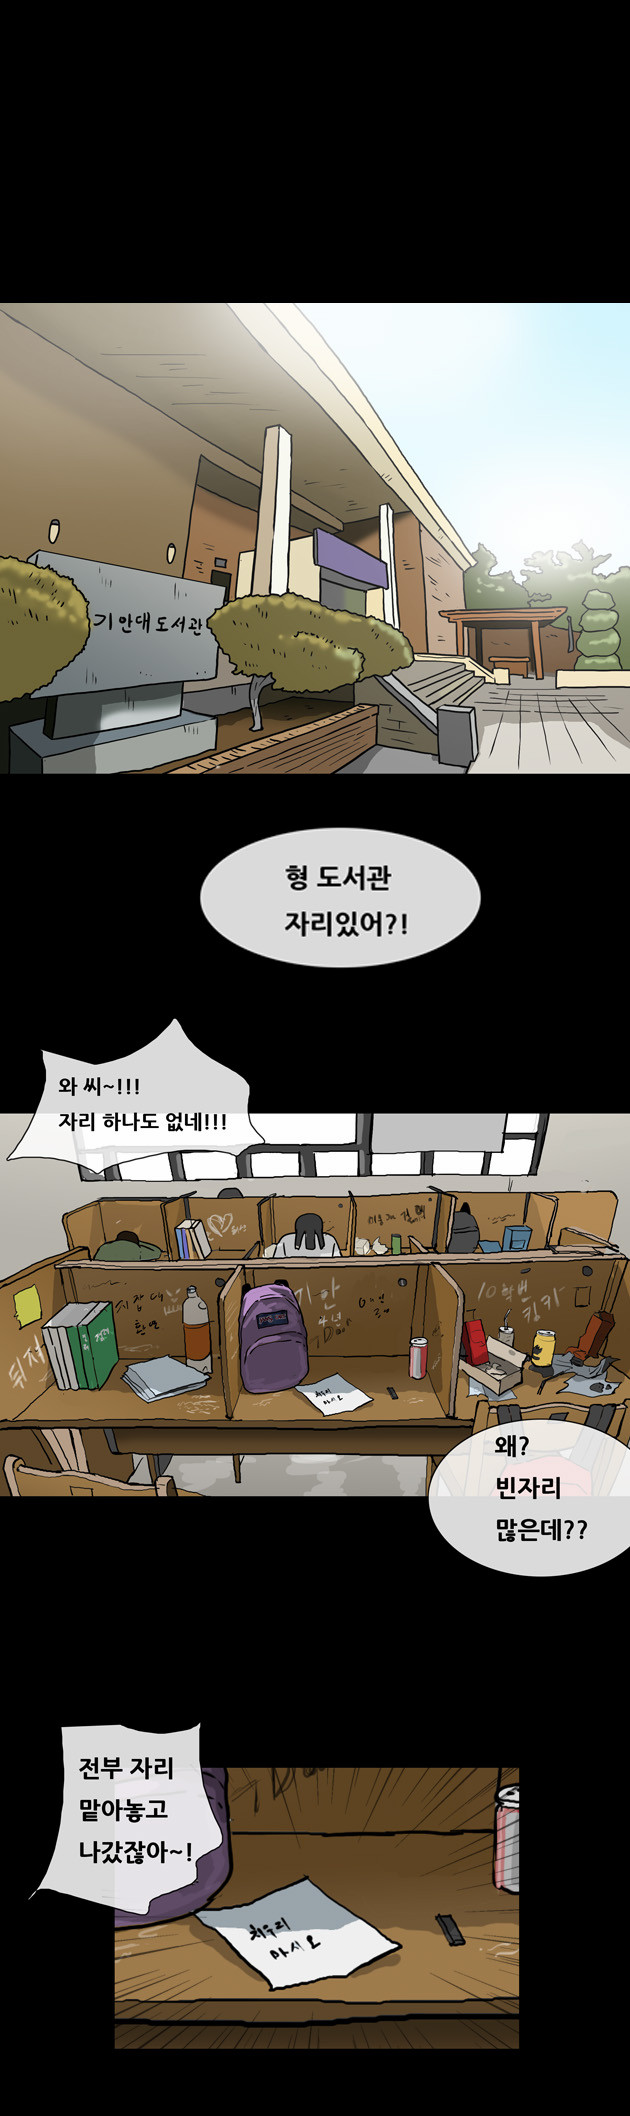

In [10]:
# Image 패키지를 통해 응답으로 받은 이미지를 실제 화면에 출력합니다.
# Image 패키지는 응답으로 받은 이미지를 확인하기 위해 활용되었으며, 이미지를 다루는 자세한 방법은 생략합니다.
with open("test.png", "wb") as f:
    f.write(response.content)

img = Image.open("test.png")
img 